In [8]:
# importing the necessary libraries
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
import seaborn as sns

# setting white grid background
sns.set_style('whitegrid')
#%matplotlib notebook
%matplotlib inline


# Preview

Within this exercise we want to show the implementation of a supervised learning procedure with the necessary pre- and post-processing steps using the use case of the energy prediction of a machining process.

Our goal is to perform a regression analysis using the data that we have to train different regression models to predict the target variable. In our use case we want to predict the energy requirement to perform a milling process.



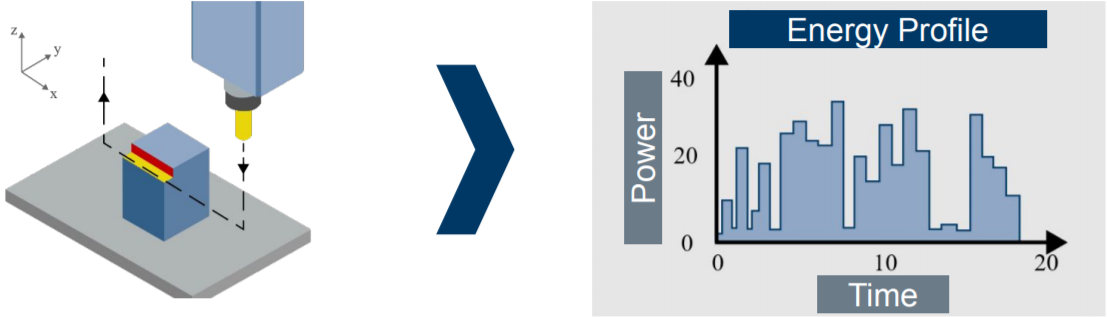

<div>
<img src="attachment:ML6.png" width="800"/>
</div>

Based on the planned process parameters, the energy required for the milling process is to be forecasted. As a basis for the development of a regression model, tests were carried out on a milling machine to gain sufficient data for the training.

#### Structure of a milling machine

Using the Cartesian coordinate system, a machine can be controlled along each axis. Based on each axis, you typically get the following movements from the perspective of an operator facing the machine:
- X axis allows movement “left” and “right”
- Y axis allows movement “forward” and “backward”
- Z axis allows movement “up” and “down”

# Data loading and overview

In [9]:
df=pd.read_csv('C:/Users/Admin/Desktop/VHB the second term/Machine Learning for Engineers/Part 1/Exercise 1/ML4Eng_I_dataset_energy_measurement.txt')
# statistical analysis of the dataset
df.describe()

,Axis,Feed,Path,Energy_Requirement
count,224.000000,225.000000,225.000000,226.000000
mean,2.093750,1759.200000,1.644444,0.060063
std,1.447173,887.559998,43.726604,0.163246
min,-5.000000,20.000000,-200.000000,-0.272149
25%,1.000000,1000.000000,-30.000000,0.012769
50%,2.000000,2000.000000,10.000000,0.038631
75%,3.000000,2500.000000,40.000000,0.063982
max,15.000000,3000.000000,150.000000,0.900000


>**Comment:** <span style="color:green"> The function "df.describe" shows us the statistics basis. We have in total 224, 225, 225, 226 values of "Axis", "Feed", "Path", "Energy_Requirement" accordingly. The arithmetic average of "Axis", "Feed", "Path", "Energy_Requirement" is 2.09, 1759.2, 1.64, 0.06 accordingly. Std means standard deviation, this value for "Axis", "Feed", "Path", "Energy_Requirement" is 1.44, 887.55, 43.72, 0.16 accordingly. The minimum value is -5, 20, -200, -0.27 is for "Axis", "Feed", "Path", "Energy_Requirement" accordingly. The maximum value is 15, 3000, 150, 0.9 is for "Axis", "Feed", "Path", "Energy_Requirement" accordingly. "25%" splits off the lowest 25% of data from the highest 75%. It means we define a so-called "boundary" between lowest 25% data-numbers and highest 75% data-numbers of lowest. "50%" is a median, a value that cuts data set in half. "75%" splits off the highest 25% of data from the lowest 75%. It means we define a value that contains 75% of lowest data when then highest data-numbers go after the value defined at 75%. These values are presented on the graph above. </span> 

In [10]:
# I am gonna show first 5 rows
df.head(5)

,Axis,Feed,Path,Energy_Requirement
0,-1.0,20.0,120.0,0.600000
1,-5.0,100.0,150.0,0.700000
2,10.0,150.0,130.0,0.800000
3,15.0,50.0,-200.0,0.900000
4,1.0,500.0,10.0,0.009795


# Visualization

>**Comment:** <span style="color:green"> It is important, because we see not only "raw" data, but also image-presented, that allows to find out more insights and define the further plan to work on </span>

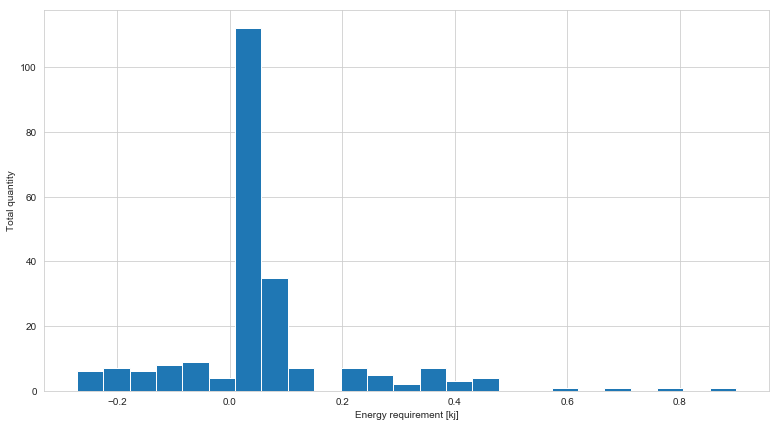

In [11]:
# plotting the attribute "Energy_Requirement" with the total ammount of each its target value
%matplotlib inline
plt.figure(figsize=(13,7))
plt.hist(df.Energy_Requirement, bins=25, range = (df.Energy_Requirement.min(), df.Energy_Requirement.max()))
plt.xlabel('Energy requirement [kj]')
plt.ylabel('Total quantity')
plt.show()

C:\Users\Admin\Anaconda3\lib\site-packages\numpy\lib\histograms.py:746: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Admin\Anaconda3\lib\site-packages\numpy\lib\histograms.py:747: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


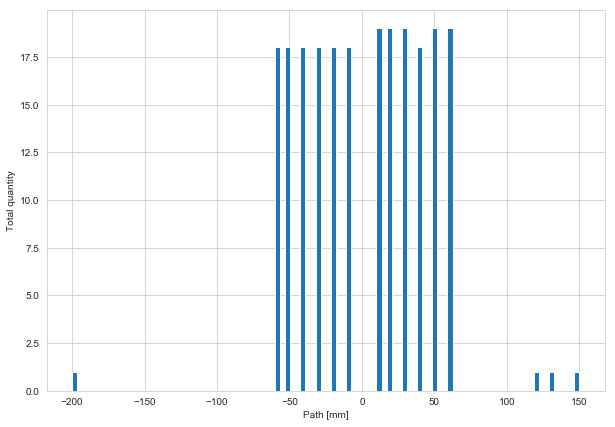

In [12]:
# plotting the attribute "Path"
%matplotlib inline
plt.figure(figsize=(10,7))
plt.hist(df.Path, bins = 100, range = (df.Path.min(), df.Path.max()))
plt.xlabel('Path [mm]')
plt.ylabel('Total quantity')
plt.show()

C:\Users\Admin\Anaconda3\lib\site-packages\numpy\lib\histograms.py:746: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Admin\Anaconda3\lib\site-packages\numpy\lib\histograms.py:747: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


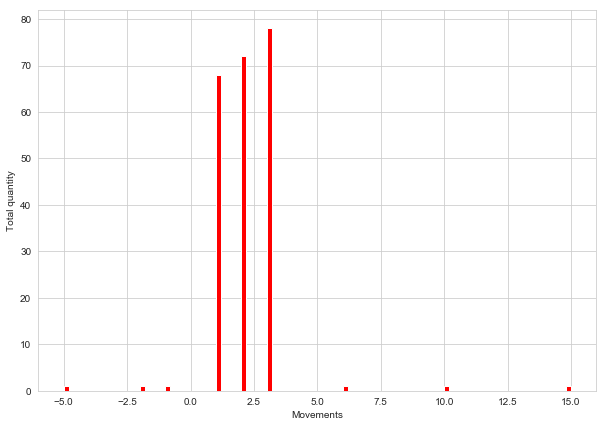

In [13]:
# plotting the attribute "Axis"
%matplotlib inline
plt.figure(figsize=(10,7))
plt.hist(df.Axis,bins = 100, range = (df.Axis.min(), df.Axis.max()), color = "red")
plt.xlabel('Movements')
plt.ylabel('Total quantity')
plt.show()

C:\Users\Admin\Anaconda3\lib\site-packages\numpy\lib\histograms.py:746: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Admin\Anaconda3\lib\site-packages\numpy\lib\histograms.py:747: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


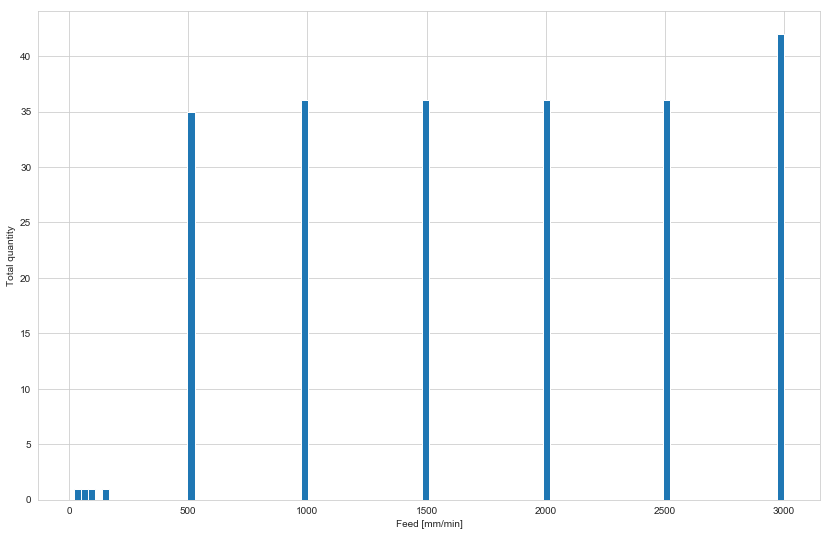

In [14]:
# plotting the attribute "Feed"
%matplotlib inline
plt.figure(figsize=(14,9))
plt.hist(df.Feed, bins = 100, range = (df.Feed.min(), df.Feed.max()))
plt.xlabel('Feed [mm/min]')
plt.ylabel('Total quantity')
plt.show()

# Missing values

In [15]:
# As we see we have some "NaN" values, therefore we gonna avoid data containing such "NaN" values
df.head(10)

,Axis,Feed,Path,Energy_Requirement
0,-1.0,20.0,120.0,0.600000
1,-5.0,100.0,150.0,0.700000
2,10.0,150.0,130.0,0.800000
3,15.0,50.0,-200.0,0.900000
4,1.0,500.0,10.0,0.009795
5,6.0,NaN,20.0,0.019462
6,NaN,500.0,30.0,0.029309
7,-2.0,500.0,NaN,0.038570
8,NaN,500.0,50.0,0.048310
9,1.0,500.0,60.0,0.057809


In [16]:
df=df.dropna()
df.head(10)

,Axis,Feed,Path,Energy_Requirement
0,-1.0,20.0,120.0,0.600000
1,-5.0,100.0,150.0,0.700000
2,10.0,150.0,130.0,0.800000
3,15.0,50.0,-200.0,0.900000
4,1.0,500.0,10.0,0.009795
9,1.0,500.0,60.0,0.057809
10,1.0,1000.0,10.0,0.010401
11,1.0,1000.0,20.0,0.020560
12,1.0,1000.0,30.0,0.030982
13,1.0,1000.0,40.0,0.041358


# Handling outliers

>**Comment:** <span style="color:green">We need to remove outliers for a reason to adjust our model in a better way </span>

In [17]:
# Show statistical data without removing outliers
df.describe()

,Axis,Feed,Path,Energy_Requirement
count,222.000000,222.000000,222.000000,222.000000
mean,2.094595,1776.216216,1.216216,0.060535
std,1.402992,881.272788,43.841117,0.164672
min,-5.000000,20.000000,-200.000000,-0.272149
25%,1.000000,1000.000000,-30.000000,0.012699
50%,2.000000,2000.000000,10.000000,0.039071
75%,3.000000,2500.000000,40.000000,0.065277
max,15.000000,3000.000000,150.000000,0.900000


In [18]:
#Since we have performed the tests for the independent variables (feed, axis and path) we know the range of these values.
#Axis: 1 to 3
#distance: -60 to 60 [mm]
#Feed rate: 500 to 3000 [mm/min]
#All values outside these ranges are therefore outliers.
df=df.loc[(df.Axis >= 1) & (df.Axis <= 3) & (df.Path >= -60) & (df.Path <= 60) & (df.Feed >= 500) & (df.Feed <= 3000)]
df.describe()

,Axis,Feed,Path,Energy_Requirement
count,218.000000,218.000000,218.000000,218.000000
mean,2.045872,1807.339450,0.321101,0.047884
std,0.818961,858.431366,39.072043,0.135879
min,1.000000,500.000000,-60.000000,-0.272149
25%,1.000000,1000.000000,-30.000000,0.012676
50%,2.000000,2000.000000,10.000000,0.038600
75%,3.000000,2500.000000,37.500000,0.061995
max,3.000000,3000.000000,60.000000,0.450567


>**Comment:** <span style="color:green">Since we remove outliers, our statistical data has been changed to some extent. The mean has not been changed significantly regarding "Axis", "Feed" and "Energy Requirement", but for "Path" the change is very significant. For Standard Deviation (std), the change is significant only for "Axis", for other attributes it does not make sense too much. Of course, "max" and "min" have been changed for each one, because we create a new bracket within the data is applied. For other properties the change is absent or little. </span>

 # Seperation features and target variable

In [19]:
# We separate the features (axis, feed, distance) and store it in 'X_multi' then we store our target varible (energy) in 'Y_target' to train our model.
X_multi = df.drop('Energy_Requirement', True)
# energy requirement is our target variable
Y_target = df.Energy_Requirement

# Splitting the data into training and test sets

In [20]:
# The given dataset is divided into training and test datasets.
import sklearn
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X_multi, Y_target, random_state = 42)

In [21]:
# Checking the shapes of the datasets so that we dont wrongly fit the data
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(163, 3) (163,) (55, 3) (55,)


>**Comment:** <span style="color:green">as we see by default we have 55 for test and 163 for train. It means the proportion is test:train = 1:4. Other words 25% of data for test and 75% for train </span>

# Linear regression

In [22]:
# import the library
from sklearn.linear_model import LinearRegression

In [23]:
# training the model
lreg = LinearRegression()
lreg.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [24]:
# prediction
pred_train = lreg.predict(X_train) # prediction of the training data
pred_test = lreg.predict(X_test) # prediction of unseen data

In [25]:
# import libraries to calculate losses
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [26]:
# We calulate the error for the training and test datasets
# Training data
MSE_linear_Train_Data = mean_squared_error(Y_train, pred_train)
MAE_linear_Train_Data = mean_absolute_error(Y_train, pred_train)
print("The Mean Square Error on the training data is:", MSE_linear_Train_Data)
print("The Mean Absolute Error on the training data is:", MAE_linear_Train_Data)

The Mean Square Error on the training data is: 0.011678924858811791
The Mean Absolute Error on the training data is: 0.09121547964727235


In [27]:
# Test data / unseen data
MSE_linear_Test_Data = mean_squared_error(Y_test, pred_test)
MAE_linear_Test_Data = mean_absolute_error(Y_test, pred_test)
print("The Mean Square Error on the test data is:", MSE_linear_Test_Data)
print("The Mean Absolute Error on the test data is:", MAE_linear_Test_Data)

The Mean Square Error on the test data is: 0.013044389500115314
The Mean Absolute Error on the test data is: 0.09051149946610133


>**Comment:** <span style="color:green">As we see MSE and MAE work on test and training data very precisely. Why? Because MSE and MAE should tend to "0" value, it means our model works ideally without errors. In our case, the model works with error at about equal to 1% in both cases training and test data. MSE and MAE for test data are especially important because we check whether our model is able to work in the same way with unseen data. In our case it works. </span>

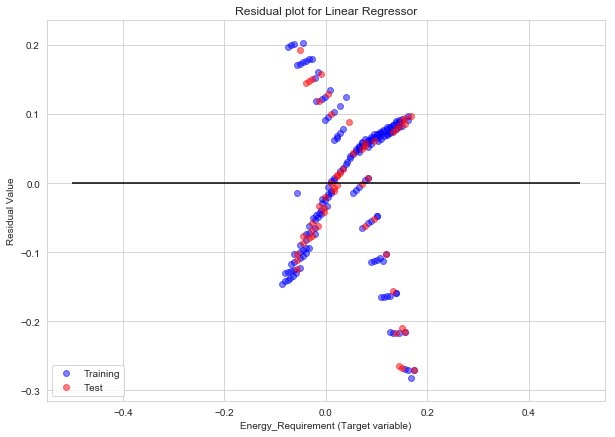

In [28]:
# We want the data points to be scattered around the horizontal line
# Ideally, the y-axis value should be 0 (no deviation)
%matplotlib inline
plt.figure(figsize=(10,7))
train = plt.scatter(pred_train, (pred_train-Y_train), c='b', alpha=0.5)
test = plt.scatter(pred_test, (pred_test-Y_test), c='r', alpha=0.5)
plt.hlines(y=0, xmin=-0.5, xmax=0.5)
plt.legend((train, test), ('Training', 'Test'),loc='lower left')
plt.title('Residual plot for Linear Regressor')
plt.xlabel("Energy_Requirement (Target variable)")
plt.ylabel("Residual Value")
plt.show()

# Random Forest Regressor

In [29]:
# Import Random Forest Regressor from Sklearn
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
#n_estimators: number of trees
#random_state: a definite value of random_state will always produce same results if given with same parameters and training data.

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [30]:
# Train the model on training data
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
rf.fit(X_train, Y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [31]:
# prediction
rf_pred_train = rf.predict(X_train)
rf_pred_test = rf.predict(X_test)

In [32]:
# import libraries to calculate losses
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [33]:
# We calulate the error for the training and test datasets
MSE_rf_Train_Data = mean_squared_error(Y_train, rf_pred_train)
MAE_rf_Train_Data = mean_absolute_error(Y_train, rf_pred_train)
print("Mean Square Error on the training data is:", MSE_rf_Train_Data)
print("Mean Absolute Error on the training data is:", MAE_rf_Train_Data)
MSE_rf_Test_Data = mean_squared_error(Y_test, rf_pred_test)
MAE_rf_Test_Data = mean_absolute_error(Y_test, rf_pred_test)
print("\n""Mean Square Error on the test data is:", MSE_rf_Test_Data)
print("Mean Absolute Error on the test data is:", MAE_rf_Test_Data)

Mean Square Error on the training data is: 6.283828953112904e-05
Mean Absolute Error on the training data is: 0.0026433659624169473

Mean Square Error on the test data is: 0.00017578390486241372
Mean Absolute Error on the test data is: 0.005909172833707262


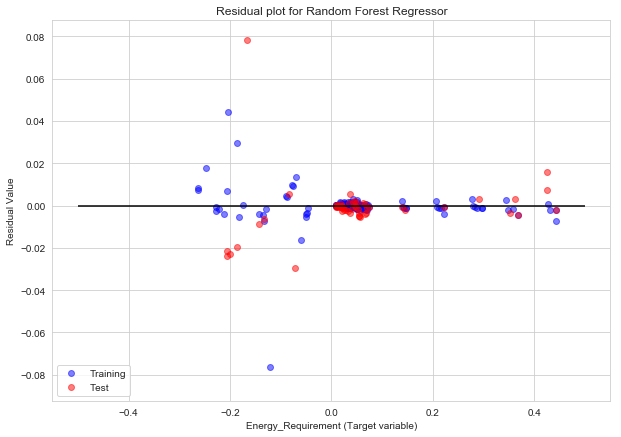

In [34]:
# Next we want the data points to be scattered around the horizontal line
%matplotlib inline
plt.figure(figsize=(10,7))
train = plt.scatter(rf_pred_train, (rf_pred_train-Y_train), c='b', alpha=0.5)
test = plt.scatter(rf_pred_test, (rf_pred_test-Y_test), c='r', alpha=0.5)
plt.hlines(y=0, xmin=-0.5, xmax=0.5)
plt.legend((train, test), ('Training', 'Test'),loc='lower left')
plt.title('Residual plot for Random Forest Regressor')
plt.xlabel("Energy_Requirement (Target variable)")
plt.ylabel("Residual Value")
plt.show()
#Here we see that the model performs well on both, the training dataset as well as the test dataset, as the blue and red points are fairly close to the horizontal line and they are equally distributed.

# Support Vector Regression (SVR)

In [35]:
# Import Support Vector Regression (SVR)
from sklearn.svm import SVR

In [36]:
# Training the model
lsvr = SVR(kernel = "rbf")
lsvr.fit(X_train, Y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [37]:
# Prediction
svr_pred_train = lsvr.predict(X_train)
svr_pred_test = lsvr.predict(X_test)

In [38]:
# import libraries to calculate losses
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [39]:
# calculating errors on training and test data
MSE_lsvr_Train_Data = mean_squared_error(Y_train, svr_pred_train)
MAE_lsvr_Train_Data = mean_absolute_error(Y_train, svr_pred_train)
print("Mean Square Error on the training data is:", MSE_lsvr_Train_Data)
print("Mean Absolute Error on the training data is:", MAE_lsvr_Train_Data)
MSE_lsvr_Test_Data = mean_squared_error(Y_test, svr_pred_test)
MAE_lsvr_Test_Data = mean_absolute_error(Y_test, svr_pred_test)
print("\nMean Square Error on the test data is:", MSE_lsvr_Test_Data)
print("Mean Absolute Error on the test data is:", MAE_lsvr_Test_Data)

Mean Square Error on the training data is: 0.005038542922624211
Mean Absolute Error on the training data is: 0.0604679912761974

Mean Square Error on the test data is: 0.01988013616342001
Mean Absolute Error on the test data is: 0.09897462471731738


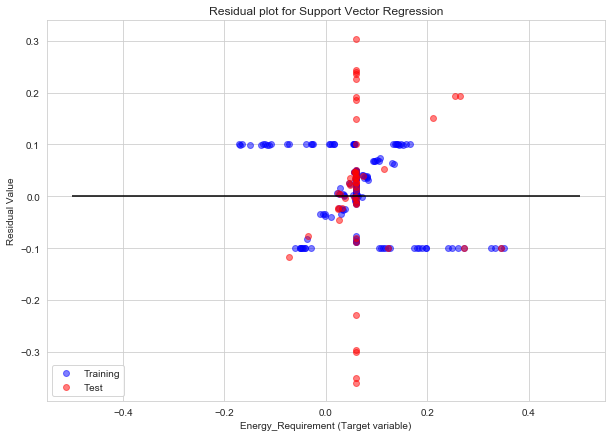

In [40]:
# Put data points scattered around the horizontal line
%matplotlib inline
plt.figure(figsize=(10,7))
train = plt.scatter(svr_pred_train, (svr_pred_train-Y_train), c='b', alpha=0.5)
test = plt.scatter(svr_pred_test, (svr_pred_test-Y_test), c='r', alpha=0.5)
plt.hlines(y=0, xmin=-0.5, xmax=0.5)
plt.legend((train, test), ('Training', 'Test'),loc='lower left')
plt.title('Residual plot for Support Vector Regression')
plt.xlabel("Energy_Requirement (Target variable)")
plt.ylabel("Residual Value")
plt.show()

# Comparison and results

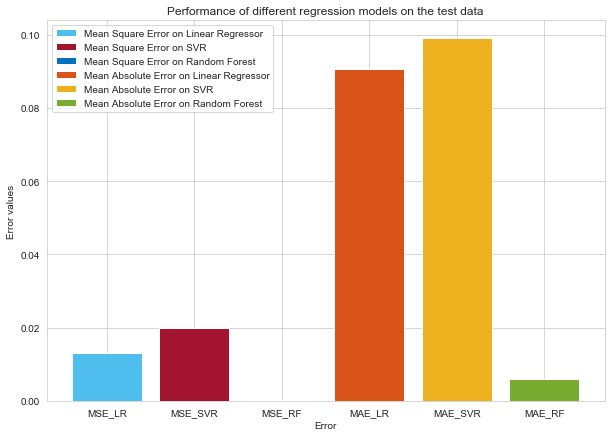

In [41]:
# visualisation of the results
%matplotlib inline
plt.figure(figsize=(10,7))
plt.bar(['MSE_LR'],[MSE_linear_Test_Data], color=['#4DBEEE'], label="Mean Square Error on Linear Regressor")
plt.bar(['MSE_SVR'],[MSE_lsvr_Test_Data], color=['#A2142F'], label="Mean Square Error on SVR")
plt.bar(['MSE_RF'],[MSE_rf_Test_Data], color=['#0072BD'], label="Mean Square Error on Random Forest")

plt.bar(['MAE_LR'],[MAE_linear_Test_Data], color=['#D95319'], label="Mean Absolute Error on Linear Regressor")
plt.bar(['MAE_SVR'],[MAE_lsvr_Test_Data], color=['#EDB120'], label="Mean Absolute Error on SVR")
plt.bar(['MAE_RF'],[MAE_rf_Test_Data], color=['#77AC30'], label="Mean Absolute Error on Random Forest")

plt.xlabel('Error')
plt.ylabel('Error values')
plt.title('Performance of different regression models on the test data')
plt.legend(loc="upper left")
plt.show()
# As we see the best way to deploy the "Random Forest Regressor" model since the sum of errors is less comparing others 

>**Comment:** <span style="color:green">As we see MSE and MAE work on test and training data very precisely. Why? Because MSE and MAE should tend to "0" value, it means our model works ideally without errors. In our case, the model works with error at about equal to 1% in both cases training and test data. MSE and MAE for test data are especially important because we check whether our model is able to work in the same way with unseen data. In our case it works. </span>

# Deployment of the selected model

In [42]:
# we want to predict the energy requirement for the following settings of production parameters.
#1. Setting 1: axis = 2, feed = 800 [mm/min], distance = 60 [mm]
#2. Setting 2: axis = 3, feed = 2000 [mm/min], distance = 40 [mm]
#3. Setting 3: axis = 1, feed = 1200 [mm/min], distance = -20 [mm]

In [43]:
#Transforming our data-settings given above into the "Table" format
Setting_1 = {'Axis': [2],'Feed': [800],'Distance':[60]}
Setting_2 = {'Axis': [3],'Feed': [2000],'Distance':[40]}
Setting_3 = {'Axis': [1],'Feed': [1200],'Distance':[-20]}
Setting_1_d = pd.DataFrame(Setting_1)
Setting_2_d = pd.DataFrame(Setting_2)
Setting_3_d = pd.DataFrame(Setting_3)
Setting_together = pd.concat([Setting_1_d, Setting_2_d, Setting_3_d], axis = 0)

In [44]:
Setting_1_predict = rf.predict(Setting_1_d) # Predicted energy required for Setting 1
print(Setting_1_predict)
Setting_2_predict = rf.predict(Setting_2_d) # Predicted energy required for Setting 2
print(Setting_2_predict)
Setting_3_predict = rf.predict(Setting_3_d) # Predicted energy required for Setting 3
print(Setting_3_predict)
Setting_all_predict = rf.predict(Setting_together)
print(Setting_all_predict)
Full_Energy_Requirement = Setting_1_predict + Setting_2_predict + Setting_3_predict # Predicted energy required for Setting 1,2,3
print(Full_Energy_Requirement)

[0.05399213]
[0.28738718]
[0.02088795]
[0.05399213 0.28738718 0.02088795]
[0.36226726]


>**Comment:** <span style="color:green">Parameters are the configuration model, which are internal to the model. Hyperparameters are the explicitly specified parameters that control the training process. Parameters are essential for making predictions. Hyperparameters are essential for optimizing the model.</span>